In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


df = pd.read_csv("cleaned_data.csv")
df.head()


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1000,1.71,23.6,86.2,248.0,78.0,111.0,N,...,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7000,1.69,41.6,82.5,162.0,50.0,135.0,Y,...,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,46.0,86.6145,1.83,25.9,106.7,103.0,73.0,114.0,N,...,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3000,1.80,33.4,96.6,134.0,46.0,91.0,N,...,High,Y,INTERMEDIARY,175.694,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5000,1.86,28.8,102.7,146.0,64.0,141.0,Y,...,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_csv("cleaned_data.csv")

for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("CVD Risk Level", axis=1)
y = df["CVD Risk Level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE


In [6]:
# Load dataset
df = pd.read_csv("cleaned_data.csv")

# Encode categorical features
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("CVD Risk Level", axis=1)
y = df["CVD Risk Level"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y_true),
        yticklabels=np.unique(y_true)
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()



================ BASELINE MODELS (NO SMOTE, NO TUNING) ================


Logistic Regression (No SMOTE)
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       146
           1       0.59      0.66      0.63       116
           2       0.27      0.07      0.11        44

    accuracy                           0.61       306
   macro avg       0.50      0.49      0.47       306
weighted avg       0.57      0.61      0.58       306



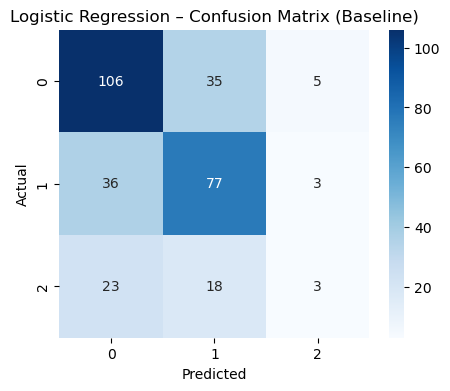


Random Forest (No SMOTE)
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       146
           1       0.58      0.59      0.59       116
           2       0.29      0.09      0.14        44

    accuracy                           0.61       306
   macro avg       0.51      0.49      0.48       306
weighted avg       0.57      0.61      0.58       306



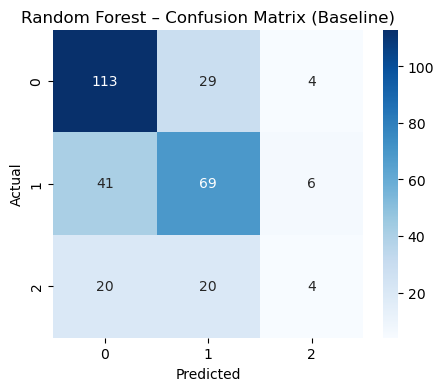


SVM (No SMOTE)
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       146
           1       0.50      0.52      0.51       116
           2       0.27      0.23      0.25        44

    accuracy                           0.57       306
   macro avg       0.49      0.49      0.49       306
weighted avg       0.56      0.57      0.57       306



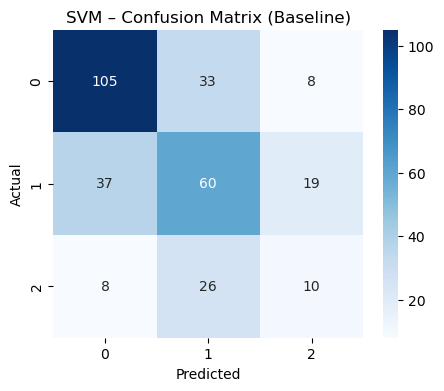


KNN (No SMOTE)
              precision    recall  f1-score   support

           0       0.57      0.72      0.63       146
           1       0.48      0.47      0.47       116
           2       0.33      0.07      0.11        44

    accuracy                           0.53       306
   macro avg       0.46      0.42      0.41       306
weighted avg       0.50      0.53      0.50       306



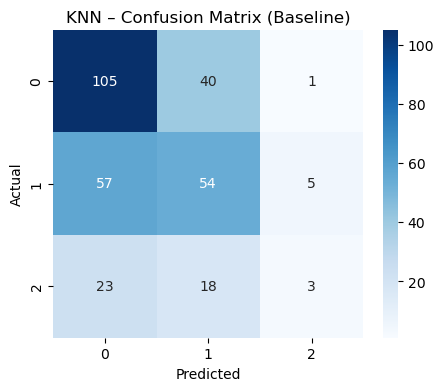


Baseline Results
                 Model  Accuracy  Recall (Macro)  F1 Score (Macro)
0  Logistic Regression  0.607843        0.486001          0.472260
1        Random Forest  0.607843        0.486570          0.477975
2                  SVM  0.571895        0.487897          0.489004
3                  KNN  0.529412        0.417626          0.407111


In [8]:
print("\n================ BASELINE MODELS (NO SMOTE, NO TUNING) ================\n")

baseline_models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=3000))
    ]),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(kernel="rbf", C=10))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=3))
    ])
}

baseline_results = []

for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} (No SMOTE)")
    print(classification_report(y_test, y_pred, zero_division=0))

    # 🔲 CONFUSION MATRIX (BASELINE)
    plot_confusion_matrix(
        y_test,
        y_pred,
        title=f"{name} – Confusion Matrix (Baseline)"
    )

    baseline_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Macro)": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "F1 Score (Macro)": f1_score(y_test, y_pred, average="macro", zero_division=0)
    })

baseline_df = pd.DataFrame(baseline_results)

print("\nBaseline Results")
print(baseline_df)


In [9]:
print("\n================ APPLYING SMOTE ================\n")

print("Before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())



================ APPLYING SMOTE ================

Before SMOTE:
CVD Risk Level
0    582
1    465
2    176
Name: count, dtype: int64

After SMOTE:
CVD Risk Level
1    582
0    582
2    582
Name: count, dtype: int64


In [10]:
print("\n================ MODELS WITH SMOTE (NO TUNING) ================\n")

smote_results = []

for name, model in baseline_models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    print(f"\n{name} (With SMOTE)")
    print(classification_report(y_test, y_pred, zero_division=0))

    smote_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Macro)": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "F1 Score (Macro)": f1_score(y_test, y_pred, average="macro", zero_division=0)
    })

smote_df = pd.DataFrame(smote_results)
print("\nSMOTE Results (No Tuning)")
print(smote_df)



================ MODELS WITH SMOTE (NO TUNING) ================


Logistic Regression (With SMOTE)
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       146
           1       0.63      0.59      0.61       116
           2       0.15      0.23      0.18        44

    accuracy                           0.54       306
   macro avg       0.48      0.47      0.47       306
weighted avg       0.58      0.54      0.56       306


Random Forest (With SMOTE)
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       146
           1       0.60      0.61      0.60       116
           2       0.31      0.27      0.29        44

    accuracy                           0.60       306
   macro avg       0.53      0.53      0.53       306
weighted avg       0.60      0.60      0.60       306


SVM (With SMOTE)
              precision    recall  f1-score   support

           0       0.66      0.67    

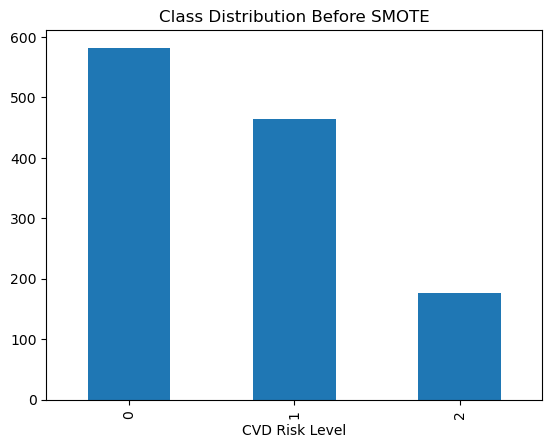

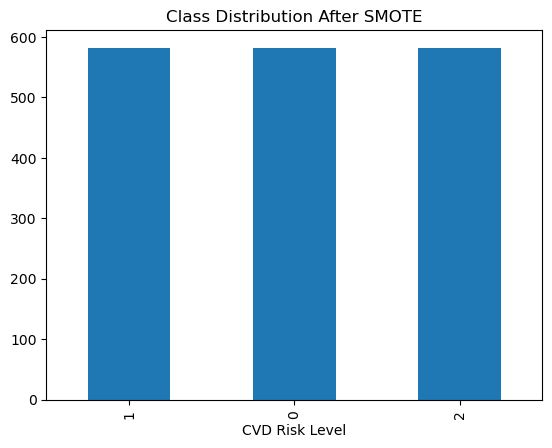

In [11]:
y_train.value_counts().plot(kind="bar", title="Class Distribution Before SMOTE")
plt.show()

y_train_smote.value_counts().plot(kind="bar", title="Class Distribution After SMOTE")
plt.show()


In [12]:
print("\n================ HYPERPARAMETER TUNING (ON SMOTE DATA) ================\n")

param_grids = {
    "Logistic Regression": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(max_iter=3000))
        ]),
        "params": {
            "model__C": [0.1, 1, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        }
    },
    "SVM": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("model", SVC())
        ]),
        "params": {
            "model__C": [1, 10],
            "model__kernel": ["rbf"]
        }
    },
    "KNN": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("model", KNeighborsClassifier())
        ]),
        "params": {
            "model__n_neighbors": [3, 5, 7]
        }
    }
}

tuned_results = []
best_models = {}

for name, cfg in param_grids.items():
    print(f"\nTuning {name}")

    grid = GridSearchCV(
        cfg["model"],
        cfg["params"],
        scoring="f1_macro",
        cv=5,
        n_jobs=1   # SAFE FOR WINDOWS
    )

    grid.fit(X_train_smote, y_train_smote)

    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)

    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, y_pred, zero_division=0))

    tuned_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Macro)": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "F1 Score (Macro)": f1_score(y_test, y_pred, average="macro", zero_division=0)
    })

tuned_df = pd.DataFrame(tuned_results)
print("\nTuned Results (SMOTE + GridSearch)")
print(tuned_df)



================ HYPERPARAMETER TUNING (ON SMOTE DATA) ================


Tuning Logistic Regression
Best Params: {'model__C': 10}
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       146
           1       0.64      0.59      0.61       116
           2       0.15      0.23      0.18        44

    accuracy                           0.54       306
   macro avg       0.48      0.47      0.47       306
weighted avg       0.58      0.54      0.56       306


Tuning Random Forest
Best Params: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       146
           1       0.60      0.59      0.59       116
           2       0.31      0.25      0.28        44

    accuracy                           0.60       306
   macro avg       0.52      0.52      0.52       306
weighted avg       0.59      0.60      0.59       306


Tuning SVM
Best Params: {'mod

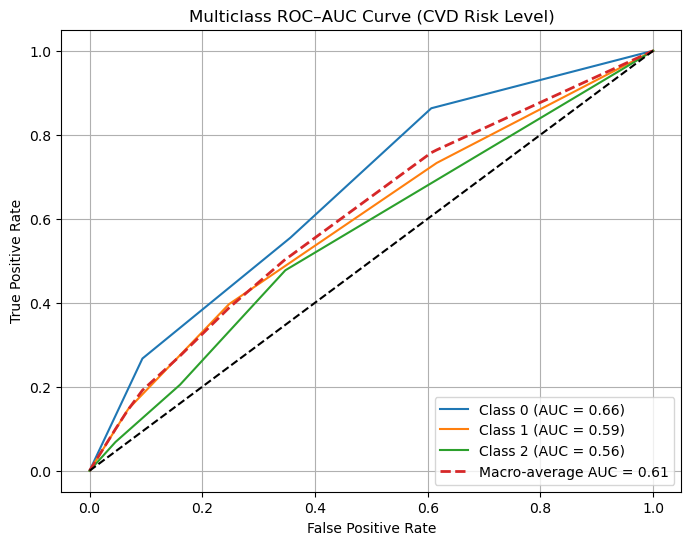

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Get unique classes
classes = np.unique(y)

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=classes)

# Get prediction probabilities from best model
y_score = best_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

# ROC curve & AUC for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ==========================================================
#  PLOT ROC–AUC
# ==========================================================

plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"Class {cls} (AUC = {roc_auc[i]:.2f})"
    )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    linestyle="--",
    linewidth=2,
    label=f"Macro-average AUC = {roc_auc['macro']:.2f}"
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC–AUC Curve (CVD Risk Level)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [14]:
best_model_name = tuned_df.sort_values(
    by="F1 Score (Macro)",
    ascending=False
).iloc[0]["Model"]

final_model = best_models[best_model_name]

print("\n================ FINAL BEST MODEL ================\n")
print("Best Model Selected:", best_model_name)
final_model.fit(X_train_smote, y_train_smote)
final_pred = final_model.predict(X_test)
print("\nFinal Evaluation on Test Set\n")
print(classification_report(
    y_test,
    final_pred,
    zero_division=0
))




================ FINAL BEST MODEL ================

Best Model Selected: Random Forest

Final Evaluation on Test Set

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       146
           1       0.60      0.59      0.59       116
           2       0.31      0.25      0.28        44

    accuracy                           0.60       306
   macro avg       0.52      0.52      0.52       306
weighted avg       0.59      0.60      0.59       306




Top 10 Important Features:
                        Feature  Importance
19               CVD Risk Score    0.074183
16                 Diastolic BP    0.066147
8   Fasting Blood Sugar (mg/dL)    0.065928
15                  Systolic BP    0.065914
1                           Age    0.064572
18        Estimated LDL (mg/dL)    0.063947
7                   HDL (mg/dL)    0.063599
2                   Weight (kg)    0.061037
4                           BMI    0.058725
6     Total Cholesterol (mg/dL)    0.058383


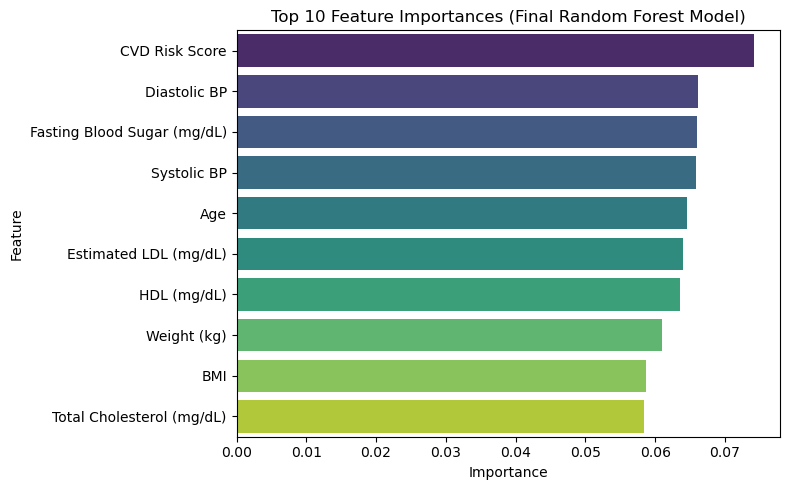

In [15]:
# ==========================================================
#  FEATURE IMPORTANCE (ONLY FOR RANDOM FOREST)
# ==========================================================

if "Random Forest" in best_model_name:
    
    # Handle Pipeline vs Direct Model
    if isinstance(final_model, Pipeline):
        rf_model = final_model.named_steps["model"]
    else:
        rf_model = final_model

    feature_importance = pd.DataFrame({
        "Feature": X.columns,
        "Importance": rf_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))

    #  Feature Importance Plot
    plt.figure(figsize=(8,5))
    sns.barplot(
    data=feature_importance.head(10),
    x="Importance",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Feature Importances (Final Random Forest Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



In [16]:
# ==========================================================
#  CROSS-VALIDATION (MODEL STABILITY)
# ==========================================================

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    final_model,
    X_train_smote,
    y_train_smote,
    cv=5,
    scoring="f1_macro"
)

print("\nCross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())



Cross-Validation F1 Scores: [0.68564069 0.69625019 0.76965688 0.77056207 0.82922757]
Mean F1 Score: 0.7502674807011316
Standard Deviation: 0.05313568409042278


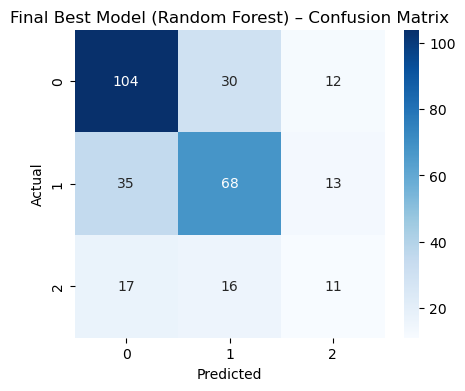

In [17]:
plot_confusion_matrix(
    y_test,
    final_pred,
    title=f"Final Best Model ({best_model_name}) – Confusion Matrix"
)
